In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [7]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [9]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

In [11]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

***Naive Bayes***

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train);

In [22]:
y_pred = classifier.predict(X_train)

In [24]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9428571428571428


In [26]:
y_pred = classifier.predict(X_test)

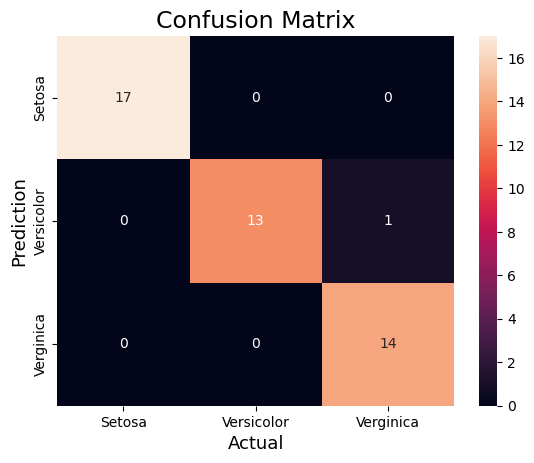

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot = True,
            fmt = 'g',
            xticklabels = ['Setosa', 'Versicolor', 'Verginica'],
            yticklabels = ['Setosa', 'Versicolor', 'Verginica'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title('Confusion Matrix', fontsize = 17)
plt.show()

In [30]:
result1 = classification_report(y_test, y_pred)
print("Classification Report: ")
print(result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy: ", result2)

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy:  0.9777777777777777


***Support Vector Machine***


In [33]:
from sklearn.svm import SVC
accuracy_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf = SVC(kernel = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  accuracy = accuracy_score(y_train,y_pred)
  accuracy_list.append(accuracy)

  print("accuracy of " + i, "is", float(accuracy))



accuracy of linear is 0.9714285714285714
accuracy of poly is 0.9333333333333333
accuracy of rbf is 0.9714285714285714
accuracy of sigmoid is 0.9047619047619048


In [35]:
accuracies = {
    'Linear' : accuracy_list[0],
    'Polynomial' : accuracy_list[1],
    'RBF' : accuracy_list[2],
    'Sigmoid' : accuracy_list[3]
}


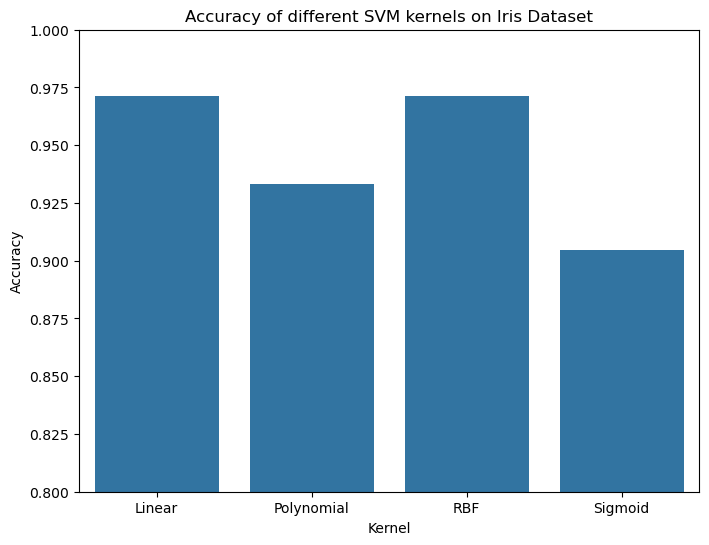

In [37]:
plt.figure(figsize= (8,6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of different SVM kernels on Iris Dataset')
plt.ylim(0.8, 1)
plt.show()

In [39]:
accuracy_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf = SVC(kernel = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)

  print("accuracy of " + i, "is", float(accuracy))

accuracy of linear is 0.9555555555555556
accuracy of poly is 0.9555555555555556
accuracy of rbf is 0.9777777777777777
accuracy of sigmoid is 0.9333333333333333


In [41]:
accuracies = {
    'Linear' : accuracy_list[0],
    'Polynomial' : accuracy_list[1],
    'RBF' : accuracy_list[2],
    'Sigmoid' : accuracy_list[3]
}

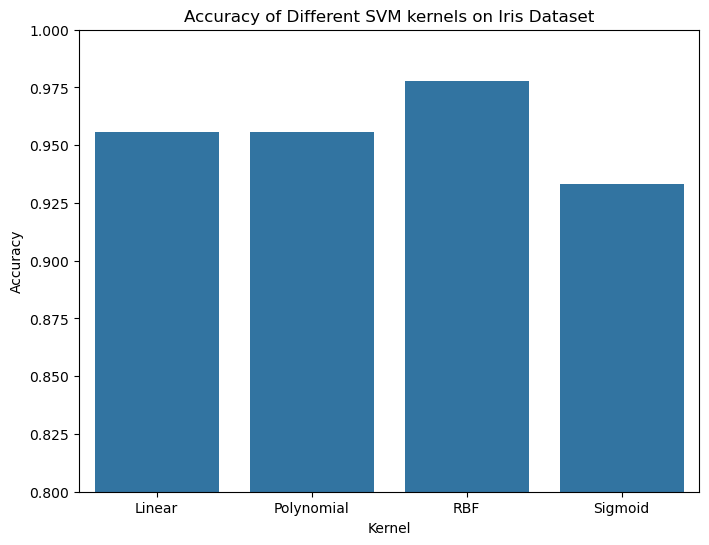

In [43]:
plt.figure(figsize = (8,6))
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM kernels on Iris Dataset')
plt.ylim(0.8,1)
plt.show()

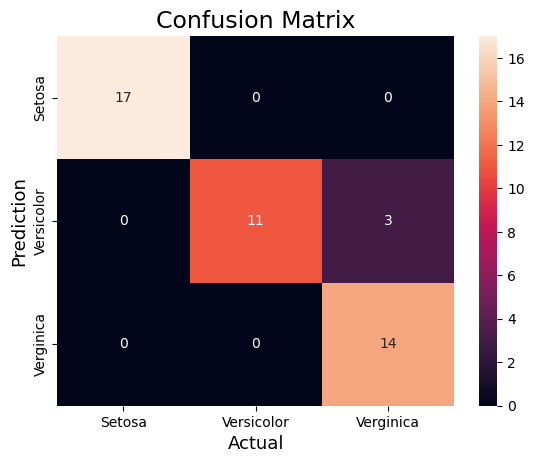

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels = ['Setosa', 'Versicolor', 'Verginica'],
            yticklabels = ['Setosa', 'Versicolor', 'Verginica'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title('Confusion Matrix', fontsize = 17)
plt.show()

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [49]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9428571428571428


In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [53]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9523809523809523


In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [57]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9523809523809523


In [59]:
y_pred = classifier.predict(X_test)

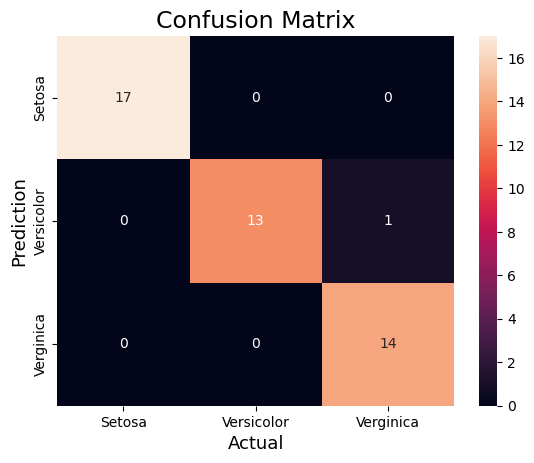

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

sns.heatmap(result,
            annot = True,
            fmt = 'g',
            xticklabels = ['Setosa', 'Versicolor', 'Verginica'],
            yticklabels = ['Setosa', 'Versicolor', 'Verginica'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title('Confusion Matrix', fontsize = 17)
plt.show()

In [ ]:
result1 = classification_report(y_test, y_pred)
print("Classification Report: ")
print(result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy: ", result2)